# Nilanjan Kumar

### LinkedIn profile - https://www.linkedin.com/in/nilanjan-kumar-05057b136/

### https://dphi.tech/practice/challenge/38#data

In [31]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )

In [128]:
audit_data.head()

checking_status  duration                    credit_history  \
0   'no checking'        18  'critical/other existing credit'   
1            '<0'        24                   'existing paid'   
2   'no checking'        36             'no credits/all paid'   
3   'no checking'        15                   'existing paid'   
4            '<0'        21                   'existing paid'   

               purpose  credit_amount savings_status employment  \
0             radio/tv           1800         '<100'   '1<=X<4'   
1             radio/tv           2439         '<100'       '<1'   
2              repairs           2613         '<100'   '1<=X<4'   
3            education           4623   '100<=X<500'   '1<=X<4'   
4  furniture/equipment           3599         '<100'   '4<=X<7'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       4  'female div/dep/mar'          none  ...   
2                       4         'male single'          none  ...   
3                       3         'male single'          none  ...   
4                       1  'female div/dep/mar'          none  ...   

   property_magnitude age  other_payment_plans housing existing_credits  \
0                 car  24                 none     own                2   
1       'real estate'  35                 none     own                1   
2                 car  27                 none     own                2   
3    'life insurance'  40                 none     own                1   
4                 car  26                 none    rent                1   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled              1           none            yes   
1                      skilled              1            yes            yes   
2                      skilled              1           none            yes   
3  'high qualif/self emp/mgmt'              1            yes            yes   
4         'unskilled resident'              1           none            yes   

  class  
0  good  
1   bad  
2  good  
3   bad  
4  good  

[5 rows x 21 columns]

In [129]:
audit_data['class'].replace(["good","bad"], [1,0], inplace=True)

In [130]:
audit_data["class"].value_counts()

1    560
0    240
Name: class, dtype: int64

In [131]:
audit_data["foreign_worker"].value_counts()

yes    772
no      28
Name: foreign_worker, dtype: int64

In [132]:
audit_data["own_telephone"].value_counts()

none    476
yes     324
Name: own_telephone, dtype: int64

In [133]:
audit_data["num_dependents"].value_counts()

1    686
2    114
Name: num_dependents, dtype: int64

In [134]:
audit_data["job"].value_counts()

skilled                        507
'unskilled resident'           154
'high qualif/self emp/mgmt'    120
'unemp/unskilled non res'       19
Name: job, dtype: int64

In [135]:
audit_data["existing_credits"].value_counts()

1    503
2    270
3     23
4      4
Name: existing_credits, dtype: int64

In [136]:
audit_data["housing"].value_counts()

own           565
rent          149
'for free'     86
Name: housing, dtype: int64

In [137]:
audit_data["other_payment_plans"].value_counts()

none      649
bank      112
stores     39
Name: other_payment_plans, dtype: int64

In [138]:
audit_data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [139]:
audit_data["property_magnitude"].value_counts()

car                    261
'real estate'          226
'life insurance'       190
'no known property'    123
Name: property_magnitude, dtype: int64

In [140]:
audit_data["residence_since"].value_counts()

4    338
2    243
3    123
1     96
Name: residence_since, dtype: int64

In [141]:
audit_data["other_parties"].value_counts()

none              726
guarantor          39
'co applicant'     35
Name: other_parties, dtype: int64

In [142]:
audit_data["personal_status"].value_counts()

'male single'           429
'female div/dep/mar'    252
'male mar/wid'           74
'male div/sep'           45
Name: personal_status, dtype: int64

In [143]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
checking_status           800 non-null object
duration                  800 non-null int64
credit_history            800 non-null object
purpose                   800 non-null object
credit_amount             800 non-null int64
savings_status            800 non-null object
employment                800 non-null object
installment_commitment    800 non-null int64
personal_status           800 non-null object
other_parties             800 non-null object
residence_since           800 non-null int64
property_magnitude        800 non-null object
age                       800 non-null int64
other_payment_plans       800 non-null object
housing                   800 non-null object
existing_credits          800 non-null int64
job                       800 non-null object
num_dependents            800 non-null int64
own_telephone             800 non-null object
foreign_worker            80

In [144]:
audit_data.head()

checking_status  duration                    credit_history  \
0   'no checking'        18  'critical/other existing credit'   
1            '<0'        24                   'existing paid'   
2   'no checking'        36             'no credits/all paid'   
3   'no checking'        15                   'existing paid'   
4            '<0'        21                   'existing paid'   

               purpose  credit_amount savings_status employment  \
0             radio/tv           1800         '<100'   '1<=X<4'   
1             radio/tv           2439         '<100'       '<1'   
2              repairs           2613         '<100'   '1<=X<4'   
3            education           4623   '100<=X<500'   '1<=X<4'   
4  furniture/equipment           3599         '<100'   '4<=X<7'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       4  'female div/dep/mar'          none  ...   
2                       4         'male single'          none  ...   
3                       3         'male single'          none  ...   
4                       1  'female div/dep/mar'          none  ...   

   property_magnitude age  other_payment_plans housing existing_credits  \
0                 car  24                 none     own                2   
1       'real estate'  35                 none     own                1   
2                 car  27                 none     own                2   
3    'life insurance'  40                 none     own                1   
4                 car  26                 none    rent                1   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled              1           none            yes   
1                      skilled              1            yes            yes   
2                      skilled              1           none            yes   
3  'high qualif/self emp/mgmt'              1            yes            yes   
4         'unskilled resident'              1           none            yes   

  class  
0     1  
1     0  
2     1  
3     0  
4     1  

[5 rows x 21 columns]

In [145]:
X = audit_data.drop(['class'], axis=1)
Y = audit_data['class']

In [146]:
#numerical variables labels
numvars = ['credit_amount', 'duration', 'installment_commitment', 'residence_since', 'age', 
           'existing_credits', 'num_dependents']

In [147]:
from sklearn.preprocessing import StandardScaler

numdata_std = pd.DataFrame(StandardScaler().fit_transform(X[numvars]))

In [148]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [149]:
from collections import defaultdict

#categorical variables labels
catvars = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment',
           'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 
           'own_telephone', 'foreign_worker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = X[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", X[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(X[catvars])

checking_status :  ["'no checking'" "'<0'" "'0<=X<200'" "'>=200'"]
checking_status :  [3 1 0 2]
credit_history :  ["'critical/other existing credit'" "'existing paid'"
 "'no credits/all paid'" "'all paid'" "'delayed previously'"]
credit_history :  [1 3 4 0 2]
purpose :  ['radio/tv' 'repairs' 'education' 'furniture/equipment' 'business'
 "'used car'" "'new car'" 'retraining' 'other' "'domestic appliance'"]
purpose :  [7 8 4 5 3 2 1 9 6 0]
savings_status :  ["'<100'" "'100<=X<500'" "'no known savings'" "'>=1000'" "'500<=X<1000'"]
savings_status :  [2 0 4 3 1]
employment :  ["'1<=X<4'" "'<1'" "'4<=X<7'" "'>=7'" 'unemployed']
employment :  [0 2 1 3 4]
personal_status :  ["'male single'" "'female div/dep/mar'" "'male mar/wid'" "'male div/sep'"]
personal_status :  [3 0 2 1]
other_parties :  ['none' 'guarantor' "'co applicant'"]
other_parties :  [2 1 0]
property_magnitude :  ['car' "'real estate'" "'life insurance'" "'no known property'"]
property_magnitude :  [3 2 0 1]
other_payment_plans : 

## Concate Transformed Dataset

In [150]:
X_clean = pd.concat([X[numvars], dummyvars], axis = 1)

print(X_clean.shape)

(800, 61)


In [151]:
X_clean = X_clean.drop(['purpose_other'],axis=1)

## Test train split

In [152]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,Y,test_size=0.2, random_state=42)

In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [154]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

In [155]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train_clean,y_train_clean)
logpred = logmodel.predict(X_test_clean)


print(confusion_matrix(y_test_clean, logpred))
print(round(accuracy_score(y_test_clean, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_clean, y_train_clean, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[29 23]
 [18 90]]
74.0


In [156]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_clean,y_train_clean)

DecisionTreeClassifier()

In [157]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = dtc, X = X_train_clean, y = y_train_clean, cv = kfold,scoring=scoring)
acc_logi.mean()

0.684375

In [158]:
y_predict_dtc = dtc.predict(X_test_clean)
acc= accuracy_score(y_test_clean, y_predict_dtc)
roc=roc_auc_score(y_test_clean,y_predict_dtc)
prec = precision_score(y_test_clean, y_predict_dtc)
rec = recall_score(y_test_clean, y_predict_dtc)
f1 = f1_score(y_test_clean, y_predict_dtc)

results = pd.DataFrame([['Decision Tree',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree   0.65625            0.684375   0.747664  0.740741  0.744186   

        ROC  
0  0.610755

In [159]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
plt.style.use('fivethirtyeight')

In [160]:
random_forest_e = RandomForestClassifier()
random_forest_e.fit(X_train_clean,y_train_clean)

RandomForestClassifier()

In [161]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_clean, y = y_train_clean, cv = kfold, scoring=scoring)
acc_rande.mean()

0.7453125

In [162]:
y_predict_r = random_forest_e.predict(X_test_clean)
roc=roc_auc_score(y_test_clean, y_predict_r)
acc = accuracy_score(y_test_clean, y_predict_r)
prec = precision_score(y_test_clean, y_predict_r)
rec = recall_score(y_test_clean, y_predict_r)
f1 = f1_score(y_test_clean, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree   0.65625            0.684375   0.747664  0.740741  0.744186   
1  Random Forest   0.75000            0.745313   0.769841  0.898148  0.829060   

        ROC  
0  0.610755  
1  0.670228

In [163]:
ada_boost_e = AdaBoostClassifier()
ada_boost_e.fit(X_train_clean,y_train_clean)

AdaBoostClassifier()

In [164]:
acc_ada = cross_val_score(estimator = ada_boost_e, X = X_train_clean, y = y_train_clean, cv = kfold, scoring=scoring)
acc_ada.mean()

0.7453125

In [165]:
y_predict_r = ada_boost_e.predict(X_test_clean)
roc=roc_auc_score(y_test_clean, y_predict_r)
acc = accuracy_score(y_test_clean, y_predict_r)
prec = precision_score(y_test_clean, y_predict_r)
rec = recall_score(y_test_clean, y_predict_r)
f1 = f1_score(y_test_clean, y_predict_r)

model_results = pd.DataFrame([['Ada boost',acc, acc_ada.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree   0.65625            0.684375   0.747664  0.740741  0.744186   
1  Random Forest   0.75000            0.745313   0.769841  0.898148  0.829060   
2      Ada boost   0.73750            0.745313   0.779661  0.851852  0.814159   

        ROC  
0  0.610755  
1  0.670228  
2  0.675926

In [166]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47))
sel.fit(X_train_clean,y_train_clean)

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 random_state=47))

In [167]:
select_X_train = sel.transform(X_train_clean)
select_X_test = sel.transform(X_test_clean) 

# train model
#selection_model = XGBClassifier()
selection_model1 = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
selection_model1.fit(select_X_train, y_train_clean)

RandomForestClassifier(criterion='entropy', random_state=47)

In [168]:
rfc_prd1 = selection_model1.predict(select_X_test)

In [169]:
roc=roc_auc_score(y_test_clean, rfc_prd1)
acc = accuracy_score(y_test_clean, rfc_prd1)
prec = precision_score(y_test_clean, rfc_prd1)
rec = recall_score(y_test_clean, rfc_prd1)
f1 = f1_score(y_test_clean, rfc_prd1)

model_results = pd.DataFrame([['RFC',acc, acc_ada.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Decision Tree   0.65625            0.684375   0.747664  0.740741  0.744186   
1  Random Forest   0.75000            0.745313   0.769841  0.898148  0.829060   
2      Ada boost   0.73750            0.745313   0.779661  0.851852  0.814159   
3            RFC   0.71875            0.745313   0.756098  0.861111  0.805195   

        ROC  
0  0.610755  
1  0.670228  
2  0.675926  
3  0.642094

In [170]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [187]:
rf_random.fit(X_train_clean,y_train_clean)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [188]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [189]:
rand_forest = RandomForestClassifier(bootstrap=False,
                                     max_depth = 90,
                                     min_samples_split=5,
                                     n_estimators = 400,
                                     random_state=42)

rand_forest.fit(X_train_clean,y_train_clean)

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [190]:
acc_rande = cross_val_score(estimator = rand_forest, X = X_train_clean, y = y_train_clean, cv = kfold, scoring=scoring)
acc_rande.mean()

0.753125

In [191]:
y_predict_r = rand_forest.predict(X_test_clean)
roc=roc_auc_score(y_test_clean, y_predict_r)
acc = accuracy_score(y_test_clean, y_predict_r)
prec = precision_score(y_test_clean, y_predict_r)
rec = recall_score(y_test_clean, y_predict_r)
f1 = f1_score(y_test_clean, y_predict_r)

model_results = pd.DataFrame([['Random Forest1',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  \
0   Decision Tree   0.65625            0.684375   0.747664  0.740741   
1   Random Forest   0.75000            0.745313   0.769841  0.898148   
2       Ada boost   0.73750            0.745313   0.779661  0.851852   
3             RFC   0.71875            0.745313   0.756098  0.861111   
4  Random Forest1   0.72500            0.753125   0.762295  0.861111   
5             KNN   0.66250            0.745313   0.682432  0.935185   
6  Random Forest1   0.71875            0.753125   0.752000  0.870370   

   F1 Score       ROC  
0  0.744186  0.610755  
1  0.829060  0.670228  
2  0.814159  0.675926  
3  0.805195  0.642094  
4  0.808696  0.651709  
5  0.789063  0.515670  
6  0.806867  0.637108

k=1 56.56 (+/- 6.28)
k=2 52.34 (+/- 3.22)
k=3 63.75 (+/- 4.52)
k=4 58.75 (+/- 4.90)
k=5 67.19 (+/- 4.07)
k=6 62.19 (+/- 4.35)
k=7 69.22 (+/- 4.42)
k=8 66.41 (+/- 3.91)
k=9 69.69 (+/- 2.90)
k=10 68.12 (+/- 4.26)
k=11 69.53 (+/- 5.05)
k=12 68.44 (+/- 5.13)
k=13 69.69 (+/- 4.09)
k=14 68.91 (+/- 4.96)
k=15 70.16 (+/- 4.16)
k=16 69.53 (+/- 3.37)
k=17 70.94 (+/- 3.97)
k=18 70.16 (+/- 3.98)
k=19 71.88 (+/- 4.01)
k=20 71.56 (+/- 3.75)
k=21 72.19 (+/- 4.06)
k=22 71.88 (+/- 4.42)
k=23 72.03 (+/- 3.59)
k=24 71.09 (+/- 3.97)
k=25 71.72 (+/- 3.86)
The optimal number of neighbors is 20 with 72.2%


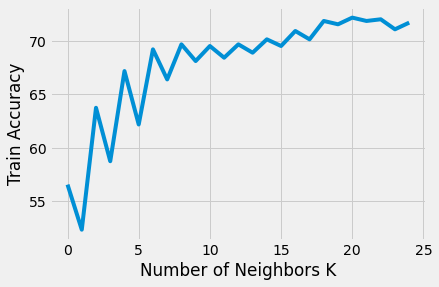

In [174]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_clean,y_train_clean, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_clean,y_train_clean)
knnpred = knn.predict(X_test_clean)

print(confusion_matrix(y_test_clean, knnpred))
print(round(accuracy_score(y_test_clean, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train_clean,y_train_clean, cv=kfold, n_jobs=1, scoring = 'accuracy').mean())

[[  5  47]
 [  7 101]]
66.0


In [176]:
y_predict_r = knnpred
roc=roc_auc_score(y_test_clean, y_predict_r)
acc = accuracy_score(y_test_clean, y_predict_r)
prec = precision_score(y_test_clean, y_predict_r)
rec = recall_score(y_test_clean, y_predict_r)
f1 = f1_score(y_test_clean, y_predict_r)

model_results = pd.DataFrame([['KNN',acc, acc_ada.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  \
0   Decision Tree   0.65625            0.684375   0.747664  0.740741   
1   Random Forest   0.75000            0.745313   0.769841  0.898148   
2       Ada boost   0.73750            0.745313   0.779661  0.851852   
3             RFC   0.71875            0.745313   0.756098  0.861111   
4  Random Forest1   0.72500            0.753125   0.762295  0.861111   
5             KNN   0.66250            0.745313   0.682432  0.935185   

   F1 Score       ROC  
0  0.744186  0.610755  
1  0.829060  0.670228  
2  0.814159  0.675926  
3  0.805195  0.642094  
4  0.808696  0.651709  
5  0.789063  0.515670

## Test data

In [178]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [179]:
numdata_std = pd.DataFrame(StandardScaler().fit_transform(test_data[numvars]))

In [180]:
# Encoding the variable
lecatdata = test_data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", test_data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(test_data[catvars])

checking_status :  ["'no checking'" "'<0'" "'0<=X<200'" "'>=200'"]
checking_status :  [3 1 0 2]
credit_history :  ["'existing paid'" "'delayed previously'" "'no credits/all paid'"
 "'critical/other existing credit'" "'all paid'"]
credit_history :  [3 2 4 1 0]
purpose :  ["'new car'" 'radio/tv' 'repairs' "'used car'" 'business'
 'furniture/equipment' 'retraining' 'education' "'domestic appliance'"]
purpose :  [1 6 7 2 3 5 8 4 0]
savings_status :  ["'no known savings'" "'<100'" "'>=1000'" "'500<=X<1000'" "'100<=X<500'"]
savings_status :  [4 2 3 1 0]
employment :  ["'4<=X<7'" "'1<=X<4'" "'>=7'" "'<1'" 'unemployed']
employment :  [1 0 3 2 4]
personal_status :  ["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"]
personal_status :  [3 0 1 2]
other_parties :  ['none' 'guarantor' "'co applicant'"]
other_parties :  [2 1 0]
property_magnitude :  ["'life insurance'" "'no known property'" 'car' "'real estate'"]
property_magnitude :  [0 1 3 2]
other_payment_plans :  ['none' '

In [181]:
test_data_clean = pd.concat([test_data[numvars], dummyvars], axis = 1)

print(test_data_clean.shape)

(200, 60)


In [182]:
ypred1 = logmodel.predict(test_data_clean)

In [184]:
res = pd.DataFrame(ypred1) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_rand.csv")

In [185]:
ypred1 = random_forest_e.predict(test_data_clean)

In [186]:
res = pd.DataFrame(ypred1) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_rand.csv")

In [192]:
ypred2 = rand_forest.predict(test_data_clean)

In [193]:
res = pd.DataFrame(ypred2) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_rand1.csv")

In [210]:
ypred3 = ada_boost_e.predict(test_data_clean)

In [211]:
res = pd.DataFrame(ypred3) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_ada.csv")